In [20]:
import random
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gurobipy as gp
from tqdm import trange, tqdm

In [75]:
def randomized_greedy_qap(distance_matrix, flow_matrix, p=0.1):
    num_facilities = distance_matrix.shape[0]
    
    unassigned = set(range(num_facilities))
    assignment = [-1] * num_facilities

    while unassigned:
        min_cost = float('inf')
        selected_pair = (None, None)

        # Consider all pairs (i, j) where i is an unassigned facility and j is a location
        candidates = []
        for i in unassigned:
            for j in range(num_facilities):
                if assignment[j] == -1:  # check if location j is unassigned
                    cost = sum(flow_matrix[i][k] * distance_matrix[j][assignment[k]] for k in range(num_facilities) if assignment[k] != -1)
                    if cost < min_cost:
                        min_cost = cost
                        selected_pair = (i, j)
                        candidates = [(i, j)]
                    elif cost == min_cost:
                        candidates.append((i, j))
        
        # Select a random pair from the top p fraction of candidates
        num_candidates_to_consider = int(p * len(candidates))
        if num_candidates_to_consider < 1:
            num_candidates_to_consider = 1
        i, j = candidates[np.random.choice(num_candidates_to_consider)]

        # Assign facility i to location j
        assignment[j] = i
        unassigned.remove(i)

    return assignment

In [47]:
def sol_cost(solution, distance_matrix, flow_matrix):
    cost = 0
    num_facilities = len(solution)
    for i in range(num_facilities):
        for j in range(num_facilities):
            cost += distance_matrix[i][j] * flow_matrix[solution[i]][solution[j]]
    return cost

In [22]:

def visualize_qap_solution(distance_matrix, flow_matrix, solution):
    num_facilities = distance_matrix.shape[0]
    cost_matrix = np.zeros((num_facilities, num_facilities))

    for i in range(num_facilities):
        for j in range(num_facilities):
            cost_matrix[i][j] = distance_matrix[i][j] * flow_matrix[solution[i]][solution[j]]

    plt.matshow(cost_matrix, cmap='viridis')
    plt.colorbar(label='Cost')
    plt.title('Cost for each Facility-Location Mapping')
    plt.xlabel('Facilities')
    plt.ylabel('Locations')
    plt.show()

In [23]:
# set up params for plots
SMALL, MED, LARGE, LW = 18, 24, 30, 3
plt.rc('axes', titlesize=SMALL)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('legend', fontsize=MED)   # legend fontsize
plt.rc('font', size=SMALL)       # controls default text sizes

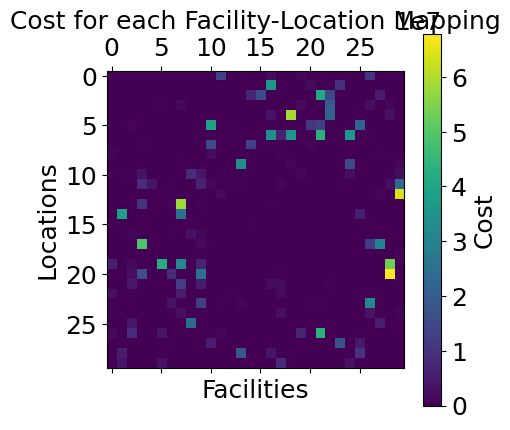

[4, 17, 7, 27, 15, 28, 16, 8, 6, 1, 5, 18, 12, 25, 26, 24, 20, 29, 0, 9, 21, 19, 2, 3, 14, 22, 10, 13, 23, 11]
1542441900


In [104]:
# for managing file opening and closing
def read_integers(filename):
    with open(filename) as f:
        return [int(elem) for elem in f.read().split()]

# Using raw string for the path
file_path = r'C:\Users\User\Desktop\AAH\QAP-main\QAP-main\QAPInstances\tai30b.dat'  # Change 'tai30b.dat' to your actual file name
file_it = iter(read_integers(file_path))

# Number of points
n = next(file_it)

# Distance between locations
w = np.array([[next(file_it) for j in range(n)] for i in range(n)])
d = np.array([[next(file_it) for j in range(n)] for i in range(n)])

solution = randomized_greedy_qap(w, d)
cost = sol_cost(solution,w,d)
visualize_qap_solution(w, d, solution)
print(solution)
print(cost)

### Automated Testing

In [108]:
instance_path = '../QAPInstances/'
soln_path     = '../QAPSolns/'

def open_solution(filename: str):
    file_it = iter(read_integers(filename))
    _ = next(file_it)    # this is just how the files within the lib are formatted
    return next(file_it)

        

def test_hueristic(n_iters=10_000):
    
    results = [] # for storing results

    for filename in tqdm(os.listdir(instance_path)):
    
        file_it = iter(read_integers(instance_path+filename))

        # open QAP instance param's 
        n = next(file_it)
        w = np.array([[next(file_it) for j in range(n)] for i in range(n)])
        d = np.array([[next(file_it) for j in range(n)] for i in range(n)])

        # generate an instance
        rg = randomized_greedy_qap(w, d)

        # open up corresponding soln from QAPLib: 
        soln_file = filename[:-4]+'.sln' # this removes the .dat from filename
        
        try:
            qap_soln = open_solution(soln_path+soln_file)
            huerstic_soln = randomized_greedy_qap(w, d)

            # compute gap
            gap = 100*(sol_cost(huerstic_soln,w,d) - qap_soln)/qap_soln
            results.append((soln_file, gap))
            

        # any instances without corresponding solution files are deleted
        except FileNotFoundError:
            os.remove(instance_path+filename) 
    
    # just printing results for now, but will need to save to file or something 
    print(results)

    return

In [111]:
test_hueristic(10)

 14%|█▍        | 18/127 [00:00<00:02, 42.42it/s]C:\Users\User\AppData\Local\Temp\ipykernel_8300\2506502942.py:35: RuntimeWarning: overflow encountered in long_scalars
  gap = 100*(sol_cost(huerstic_soln,w,d) - qap_soln)/qap_soln
 18%|█▊        | 23/127 [00:01<00:08, 12.86it/s]


KeyboardInterrupt: 